In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Define root directory paths
file_path = "../../combined_data.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,subject,activity,trial,x_ADXL345,y_ADXL345,z_ADXL345,x_ITG3200,y_ITG3200,z_ITG3200,x_MMA8451Q,y_MMA8451Q,z_MMA8451Q
0,SA01,D01,R01,17,-179,-99,-18,-504,-352,76,-697,-279
1,SA01,D01,R01,15,-174,-90,-53,-568,-306,48,-675,-254
2,SA01,D01,R01,1,-176,-81,-84,-613,-271,-2,-668,-221
3,SA01,D01,R01,-10,-180,-77,-104,-647,-227,-34,-697,-175
4,SA01,D01,R01,-21,-191,-63,-128,-675,-191,-74,-741,-133


#### Explore the data

In [4]:
df.shape

(15858929, 12)

In [5]:
df.describe()

,x_ADXL345,y_ADXL345,z_ADXL345,x_ITG3200,y_ITG3200,z_ITG3200,x_MMA8451Q,y_MMA8451Q,z_MMA8451Q
count,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07
mean,-1.237190e+00,-1.787412e+02,-2.772492e+01,-9.714189e+00,3.517304e+01,-4.465375e+00,-1.889273e+01,-7.005180e+02,-5.936869e+01
std,1.050061e+02,1.499351e+02,1.248853e+02,5.908545e+02,4.895010e+02,3.981378e+02,4.086284e+02,5.827475e+02,5.061164e+02
min,-4.096000e+03,-4.096000e+03,-4.096000e+03,-3.230300e+04,-1.549100e+04,-1.315000e+04,-8.192000e+03,-8.192000e+03,-8.192000e+03
25%,-2.200000e+01,-2.530000e+02,-9.200000e+01,-7.600000e+01,-1.800000e+01,-3.300000e+01,-9.700000e+01,-9.900000e+02,-3.170000e+02
50%,2.000000e+00,-2.300000e+02,-3.100000e+01,-1.100000e+01,3.800000e+01,-5.000000e+00,1.000000e+00,-9.050000e+02,-6.800000e+01
75%,2.600000e+01,-5.400000e+01,3.300000e+01,6.500000e+01,9.400000e+01,2.300000e+01,8.200000e+01,-2.090000e+02,1.850000e+02
max,4.094000e+03,4.092000e+03,4.091000e+03,3.276700e+04,1.581900e+04,1.379800e+04,8.191000e+03,8.191000e+03,8.191000e+03


#### Check for Outliers

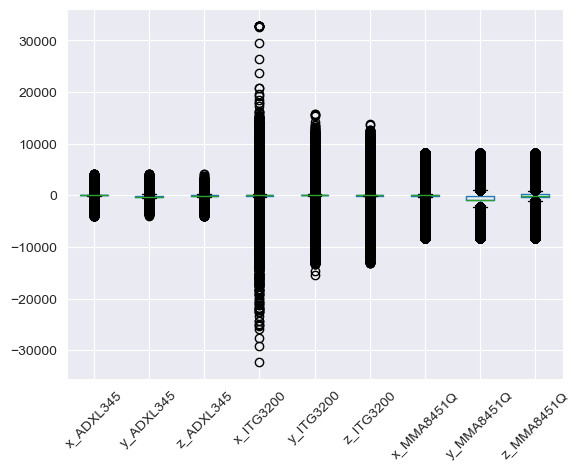

In [6]:
df.boxplot()

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()

In [7]:
print(df.subject.nunique())
print(df.activity.nunique())
print(df.trial.nunique())

print(sum(df['activity'].str.startswith("F")))
print(sum(df['activity'].str.startswith("D")))
df.shape

38
34
6
5393714
10465215


(15858929, 12)

In [8]:
df['result'] = df['activity'].apply(lambda x: 1 if x[0] == 'F' else 0)
df.head(2)

,subject,activity,trial,x_ADXL345,y_ADXL345,z_ADXL345,x_ITG3200,y_ITG3200,z_ITG3200,x_MMA8451Q,y_MMA8451Q,z_MMA8451Q,result
0,SA01,D01,R01,17,-179,-99,-18,-504,-352,76,-697,-279,0
1,SA01,D01,R01,15,-174,-90,-53,-568,-306,48,-675,-254,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15858929 entries, 0 to 15858928
Data columns (total 13 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   subject     object
 1   activity    object
 2   trial       object
 3   x_ADXL345   int64 
 4   y_ADXL345   int64 
 5   z_ADXL345   int64 
 6   x_ITG3200   int64 
 7   y_ITG3200   int64 
 8   z_ITG3200   int64 
 9   x_MMA8451Q  int64 
 10  y_MMA8451Q  int64 
 11  z_MMA8451Q  int64 
 12  result      int64 
dtypes: int64(10), object(3)
memory usage: 1.5+ GB


In [10]:
# Group the DataFrame by subject, activity, trial, and result
grouped = df.groupby(['subject', 'activity', 'trial'])
print(grouped.size())

subject  activity  trial
SA01     D01       R01      19999
         D02       R01      20000
         D03       R01      20000
         D04       R01      20000
         D05       R01       5000
                            ...  
SE15     D17       R01       9999
                   R02      10000
                   R03      10000
                   R04      10000
                   R05      10000
Length: 4500, dtype: int64


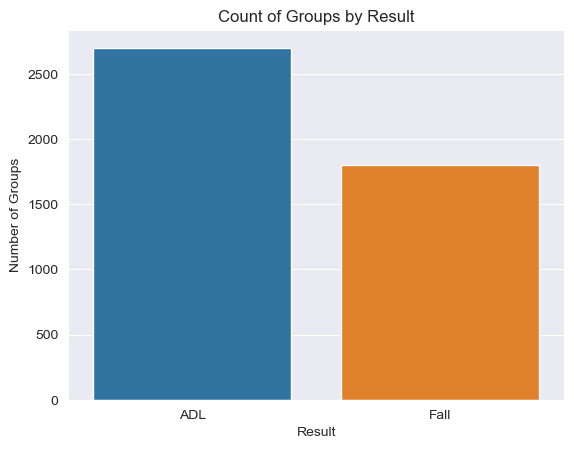

In [11]:
grouped_mean = grouped.mean()
sns.countplot(x='result', data=grouped_mean)

# Set labels and title for better readability
plt.xlabel('Result')
plt.ylabel('Number of Groups')
plt.title('Count of Groups by Result')
plt.xticks([0, 1], ['ADL', 'Fall'])  # Labeling 0 as ADL and 1 as Fall
plt.show()

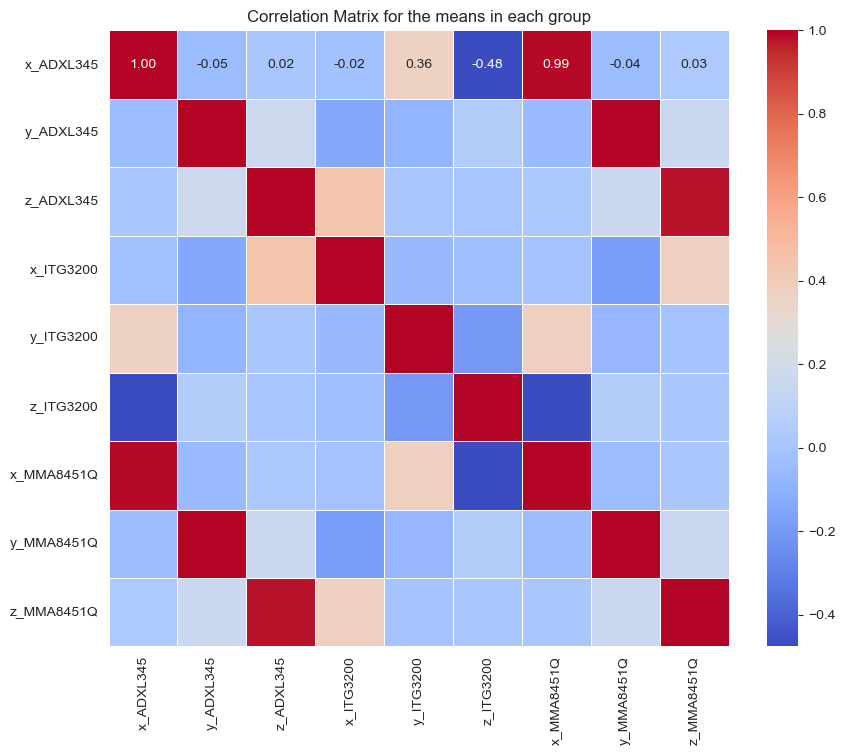

In [12]:
# Aggregating the groups, here we take the mean for each group
grouped_mean = grouped.mean()

# Select the first 5 groups (or rows) after aggregation
first_5_groups = grouped_mean

# Calculate the correlation matrix for the first 5 groups
correlation_matrix = first_5_groups[['x_ADXL345', 'y_ADXL345', 'z_ADXL345', 'x_ITG3200', 'y_ITG3200', 'z_ITG3200', 'x_MMA8451Q', 'y_MMA8451Q', 'z_MMA8451Q']].corr()

# Plotting the correlation matrix for the first 5 groups
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for the means in each group')
plt.show()

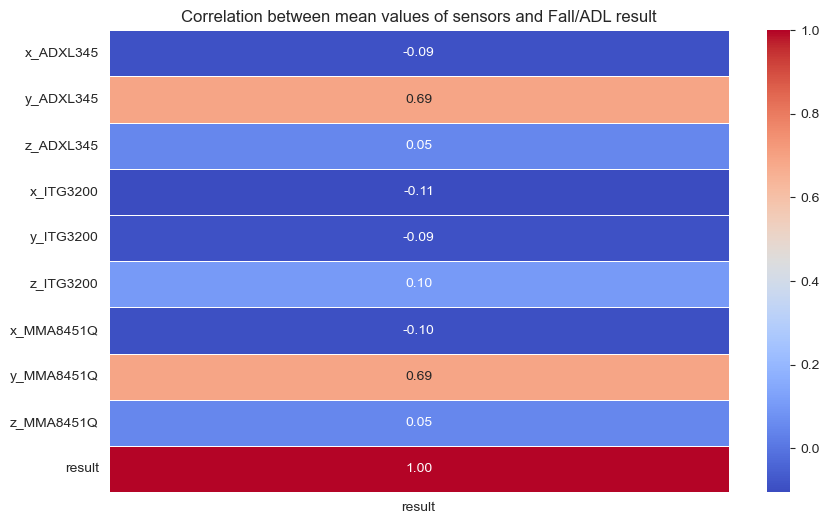

In [13]:
# Correlation matrix with result included
correlation_with_result = grouped_mean[['x_ADXL345', 'y_ADXL345', 'z_ADXL345', 'x_ITG3200', 'y_ITG3200', 'z_ITG3200', 'x_MMA8451Q', 'y_MMA8451Q', 'z_MMA8451Q', 'result']].corr()

# Plotting correlation between sensors and result
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_with_result[['result']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between mean values of sensors and Fall/ADL result')
plt.show()


#### Convert the three axes of each sensor into a single vector

Calculate the magnitude (or norm) of the 3D vector formed by combining the x, y, and z components for each sensor. \
Gives single value that represents the overall magnitude of the sensor's reading at each point in time.

##### Formula to Calculate the Magnitude (or Norm):
For each sensor axis, calculate the magnitude as follows:

\[
\text{Magnitude} = \sqrt{x^2 + y^2 + z^2}
\]

Where:
- \(x\), \(y\), and \(z\) are the sensor readings along the respective axes.



In [14]:
# Calculate the magnitude for each sensor and store them in new columns
df['ADXL345_magnitude'] = np.sqrt(df['x_ADXL345']**2 + df['y_ADXL345']**2 + df['z_ADXL345']**2)
df['ITG3200_magnitude'] = np.sqrt(df['x_ITG3200']**2 + df['y_ITG3200']**2 + df['z_ITG3200']**2)
df['MMA8451Q_magnitude'] = np.sqrt(df['x_MMA8451Q']**2 + df['y_MMA8451Q']**2 + df['z_MMA8451Q']**2)

In [15]:
# Create a new DataFrame containing only the selected columns
df_mag = df[['subject', 'activity', 'trial', 'result', 
             'ADXL345_magnitude', 'ITG3200_magnitude', 'MMA8451Q_magnitude']]

# Check the result
df_mag.head()

,subject,activity,trial,result,ADXL345_magnitude,ITG3200_magnitude,MMA8451Q_magnitude
0,SA01,D01,R01,0,205.258374,615.015447,754.603207
1,SA01,D01,R01,0,196.471372,647.355389,722.803569
2,SA01,D01,R01,0,193.747258,675.474648,703.611398
3,SA01,D01,R01,0,196.033160,693.508471,719.437280
4,SA01,D01,R01,0,202.215232,713.084848,756.469431


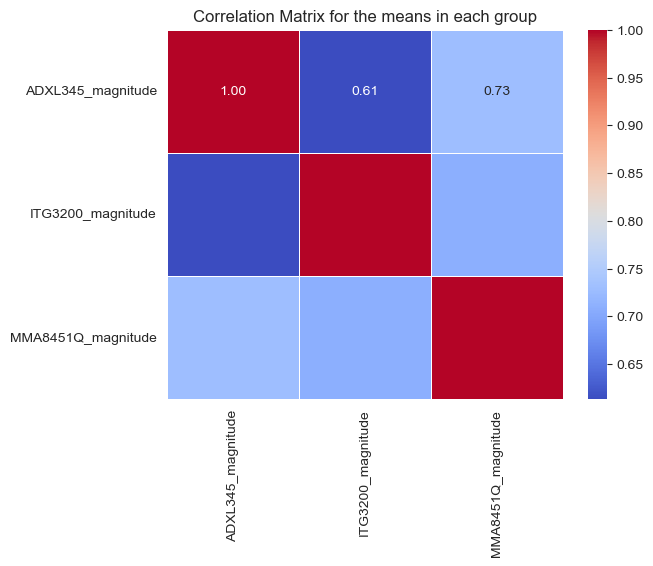

In [16]:
# Group the DataFrame by subject, activity, trial, and result
grouped_mag = df_mag.groupby(['subject', 'activity', 'trial'])

# Calculate the correlation matrix for the first 5 groups
correlation_matrix = grouped_mag.mean()[['ADXL345_magnitude', 'ITG3200_magnitude', 'MMA8451Q_magnitude']].corr()

# Plotting the correlation matrix for the first 5 groups
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for the means in each group')
plt.show()

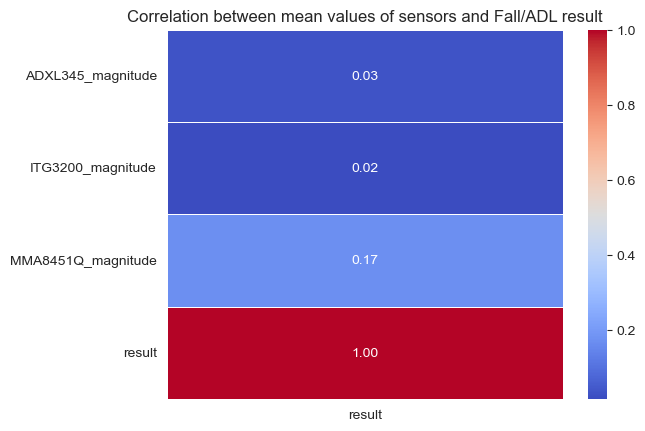

In [17]:
# Correlation matrix with result included
correlation_with_result = grouped_mag.mean()[['ADXL345_magnitude', 'ITG3200_magnitude', 'MMA8451Q_magnitude', 'result']].corr()

# Plotting correlation between sensors and result
plt.figure()
sns.heatmap(correlation_with_result[['result']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between mean values of sensors and Fall/ADL result')
plt.show()

In [25]:
def display_time_series_10(grouped__, legend):
    # Get the first 10 groups
    groups = list(grouped__.groups.keys())[-10:]

    # Plot each group
    fig, axes = plt.subplots(5, 2, figsize=(9, 12))  # Adjust grid size based on the number of plots
    axes = axes.flatten()

    for i, group_key in enumerate(groups):
        # Extract the group's data
        group_data = grouped__.get_group(group_key)

        # Plot all columns except for the group identifiers
        group_data.drop(['subject', 'activity', 'trial'], axis=1, errors='ignore').plot(
            ax=axes[i], title=f"Group: {group_key}", legend=legend
        )
        axes[i].set_xlabel("Index")
        axes[i].set_ylabel("Values")

    # Adjust layout
    plt.tight_layout()
    plt.show()

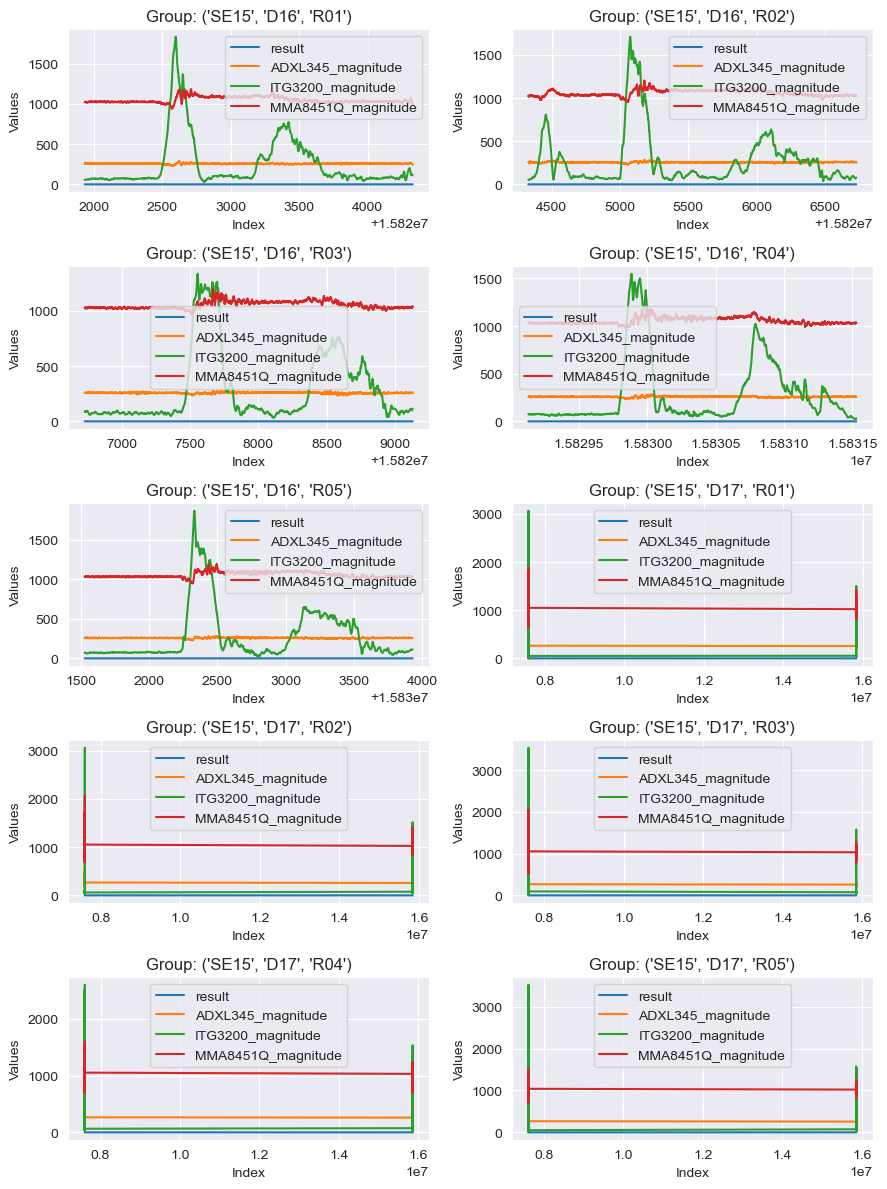

In [31]:
display_time_series_10(grouped_mag, True)

In [22]:
from sklearn.decomposition import PCA

# Perform PCA on the axes of a sensor
def perform_pca(df, sensor_prefix):
    # Extract the relevant columns for the sensor
    sensor_columns = [f"{axis}_{sensor_prefix}" for axis in ['x', 'y', 'z']]
    
    # Check if columns exist
    if all(col in df.columns for col in sensor_columns):
        # Perform PCA
        pca = PCA(n_components=1)
        pca_result = pca.fit_transform(df[sensor_columns])
        # Return the first principal component as a Series
        return pca_result.flatten()
    else:
        raise ValueError(f"Columns for sensor {sensor_prefix} not found in DataFrame.")

# Add the first principal component of each sensor to the DataFrame
df['ADXL345_pca'] = perform_pca(df, 'ADXL345')
df['ITG3200_pca'] = perform_pca(df, 'ITG3200')
df['MMA8451Q_pca'] = perform_pca(df, 'MMA8451Q')

# Create a new DataFrame containing only the PCA results
df_pca = df[['subject', 'activity', 'trial', 'result', 'ADXL345_pca', 'ITG3200_pca', 'MMA8451Q_pca']]

# Check the resulting DataFrame
df_pca.head()


,subject,activity,trial,result,ADXL345_pca,ITG3200_pca,MMA8451Q_pca
0,SA01,D01,R01,0,16.054517,-7.605829,-59.199451
1,SA01,D01,R01,0,9.196840,-43.983539,-29.685424
2,SA01,D01,R01,0,8.366727,-75.995641,-11.093041
3,SA01,D01,R01,0,10.714126,-97.055698,-25.124292
4,SA01,D01,R01,0,17.852742,-121.923331,-54.098099


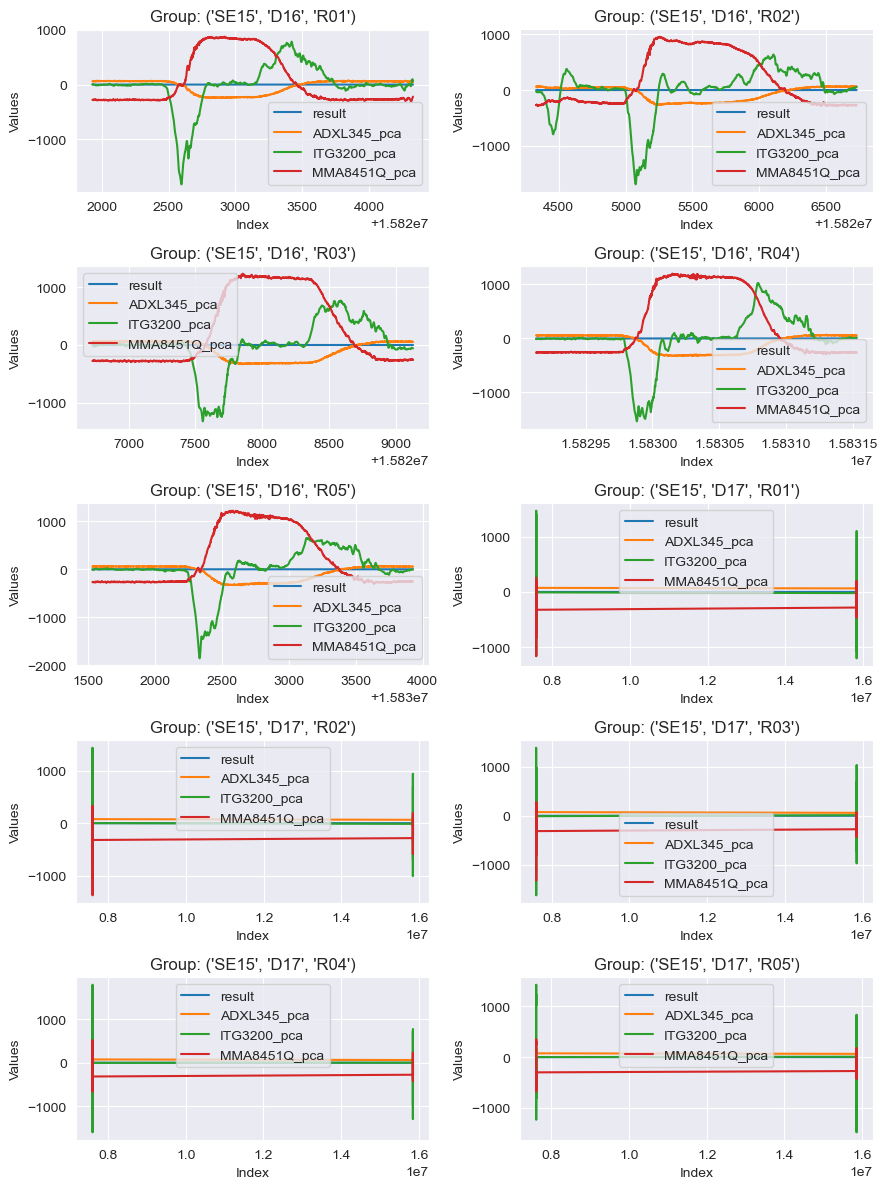

In [30]:
grouped_pca = df_pca.groupby(['subject', 'activity', 'trial'])
display_time_series_10(grouped_pca, True)

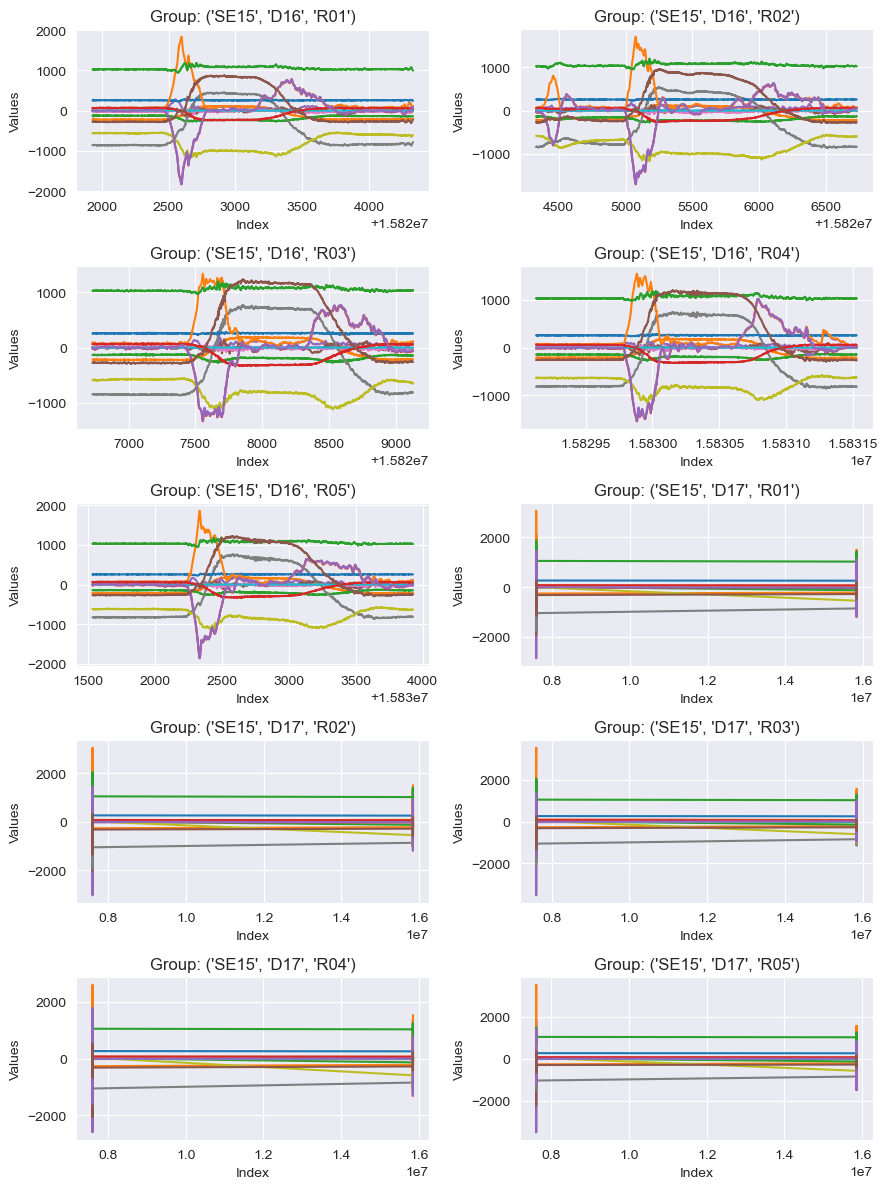

In [28]:
display_time_series_10(grouped, False)

When comparing the time series plots of original data to pca of each sensor and magnitude of each sensor, the pca results has preserved most of the details than the magnitudes. Therefore, from this point onwards the pca data of sensors will be used.